# Рассмотрим сделки по 2Б.Что делать  1С, за 2022 год

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel(r'C:\Users\kerie\Scripts\Машинное обучение\1C\Сделки\2022.xlsx')

In [3]:
data.shape

(781, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Контрагент              781 non-null    object        
 1   Номер                   781 non-null    object        
 2   ДоговорКонтрагента      781 non-null    object        
 3   СуммаДокумента          781 non-null    float64       
 4   чдДатаПервойОплаты      781 non-null    datetime64[ns]
 5   НаправлениеБизнеса      781 non-null    object        
 6   Ссылка                  781 non-null    object        
 7   ПометкаУдаления         781 non-null    object        
 8   Код                     781 non-null    int64         
 9   ИНН                     768 non-null    float64       
 10  Наименование            781 non-null    object        
 11  ВидДеятельности         308 non-null    object        
 12  ЮрФизЛицо               781 non-null    object    

# Пустые строки:
- СистемаНалогообложения (433);
- ВыручкаОтПродаж (332)

# Проведем Анализ по сумме сделок

In [5]:
quantile_15 = data['СуммаДокумента'].quantile(0.15)
quantile_20 = data['СуммаДокумента'].quantile(0.20)
quantile_25 = data['СуммаДокумента'].quantile(0.25)
median=data['СуммаДокумента'].median()
quantile_75 = data['СуммаДокумента'].quantile(0.75)

In [6]:
print('Квартили распределения суммы сделки')
print()
print(f'У 15% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nСумма сделки меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения суммы сделки

У 15% клиентов, у которых была сделка, 
Сумма сделки меньше 1400.0
а у 85% больше 1400.0


У 20% клиентов, у которых была сделка, 
Сумма сделки меньше 1500.0
а у 80% больше 1500.0


У 25% клиентов, у которых была сделка, 
Сумма сделки меньше 1500.0
а у 75% больше 1500.0


У 50% клиентов, у которых была сделка, 
Сумма сделки меньше 4200.0
а у 50% больше 4200.0


У 75% клиентов, у которых была сделка, 
Сумма сделки меньше 12000.0
а у 25% больше 12000.0


In [7]:
print(data[data['СуммаДокумента']>0]['СуммаДокумента'].min(),'Минимальная сумма сделки')
print(data['СуммаДокумента'].mean(),'Средняя сумма сделки')
print(data['СуммаДокумента'].max(),'Максимальная сумма сделки')
print(data['СуммаДокумента'].sum(),'Сумма сделок за 2022 год')

60.0 Минимальная сумма сделки
29549.59718309859 Средняя сумма сделки
3186000.0 Максимальная сумма сделки
23078235.4 Сумма сделок за 2022 год


# Проведем Анализ по системе Налогообложения

In [25]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [27]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'Код':"count",'СуммаДокумента':"sum"}) \
.rename(columns={"Код":"Количество сделок"}) \
.sort_values(by='СуммаДокумента', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаДокумента']*100/data_n_cnt['СуммаДокумента'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаДокумента','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаДокумента,% Суммы Сделок
3,Не известно,433,55.4,17683567.0,76.6
4,ОСНО,202,25.9,3656069.0,15.8
6,УСНО 15%,34,4.4,569520.0,2.5
2,ЕСХН,9,1.2,494690.0,2.1
7,УСНО 6%,77,9.9,310180.0,1.3
5,"ОСНО,УСНО",23,2.9,228909.4,1.0
1,Бюджет,2,0.3,132300.0,0.6
0,Аутсорсинг,1,0.1,3000.0,0.0


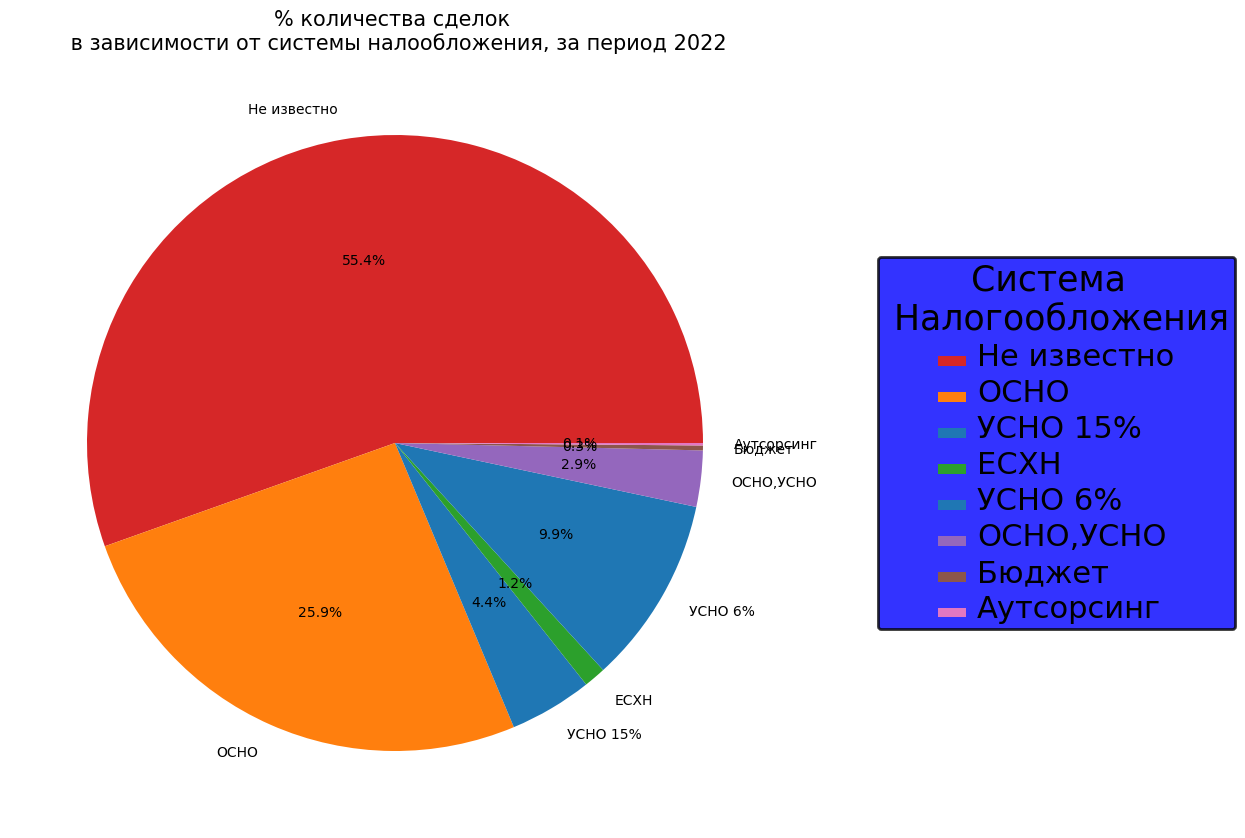

In [28]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

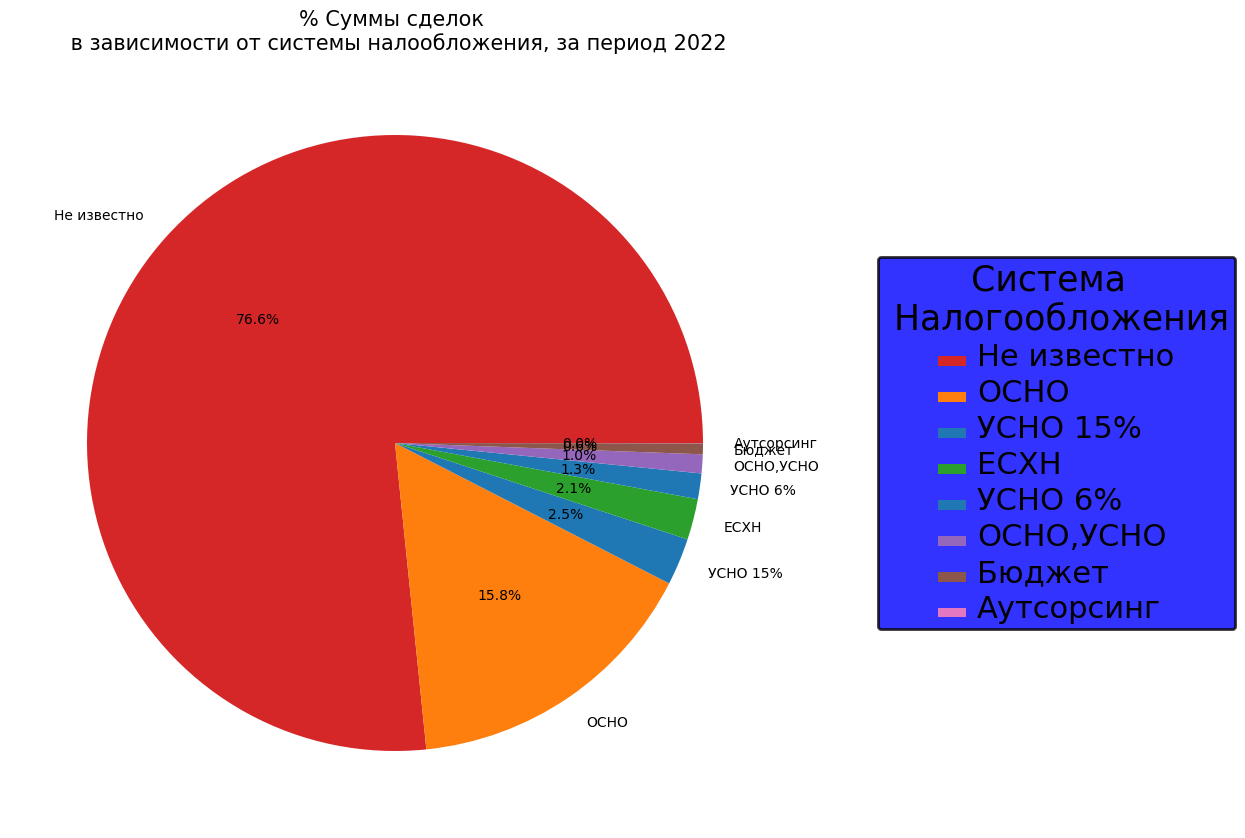

In [29]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаДокумента'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [76]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 
# Удаляем дубли
osno=osno.drop_duplicates ()

quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [77]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 38441800.0
а у 85% больше 38441800.0


У 20% клиентов, у которых была сделка, 
выручка меньше 46492800.0
а у 80% больше 46492800.0


У 25% клиентов, у которых была сделка, 
выручка меньше 51458250.0
а у 75% больше 51458250.0


У 50% клиентов, у которых была сделка, 
выручка меньше 177244000.0
а у 50% больше 177244000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 532102750.0
а у 25% больше 532102750.0


# Система Налогообложения УСНО 15%

In [78]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_15=usno_15.drop_duplicates ()

quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [79]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 7330900.0
а у 85% больше 7330900.0


У 20% клиентов, у которых была сделка, 
выручка меньше 11377600.000000002
а у 80% больше 11377600.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 17745000.0
а у 75% больше 17745000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 48240000.0
а у 50% больше 48240000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 56122000.0
а у 25% больше 56122000.0


# Система Налогообложения ECXH

In [99]:
ЕСХН=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ЕСХН'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

#Удаляем дубли
ЕСХН=ЕСХН.drop_duplicates ()

print(ЕСХН['ВыручкаОтПродаж'])

382    1.980534e+10
438    1.081580e+08
Name: ВыручкаОтПродаж, dtype: float64


# Система Налогообложения УСНО 6%

In [100]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
usno_6=usno_6.drop_duplicates ()

quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [101]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 8004000.0
а у 85% больше 8004000.0


У 20% клиентов, у которых была сделка, 
выручка меньше 15854800.000000006
а у 80% больше 15854800.000000006


У 25% клиентов, у которых была сделка, 
выручка меньше 26202500.0
а у 75% больше 26202500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 35903000.0
а у 50% больше 35903000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 91292000.0
а у 25% больше 91292000.0


# Система Налогообложения ОСНО,УСНО

In [84]:
ou=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))]\
[['Код','СистемаНалогообложения','ВыручкаОтПродаж']] 

# Удаляем дубли
ou=ou.drop_duplicates ()

quantile_15 = ou['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = ou['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = ou['ВыручкаОтПродаж'].quantile(0.25)
median=ou['ВыручкаОтПродаж'].median()
quantile_75 =ou['ВыручкаОтПродаж'].quantile(0.75)

In [85]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 7720850.0
а у 85% больше 7720850.0


У 20% клиентов, у которых была сделка, 
выручка меньше 11557400.000000004
а у 80% больше 11557400.000000004


У 25% клиентов, у которых была сделка, 
выручка меньше 19654500.0
а у 75% больше 19654500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 28663000.0
а у 50% больше 28663000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 97639000.0
а у 25% больше 97639000.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 30 млн;
- b) УСНО 15% выручка компаний от 7 млн;
- c) ECXH всего 2 компании с выручкой;
- d) УСНО 6% выручка компаний от 8 млн;
- e) ОСНО,УСНО выручка компаний от 7 млн.